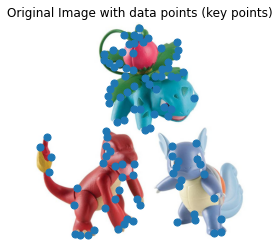

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy.spatial import distance
import warnings

warnings.filterwarnings('ignore')

# Input image read
Input_Image = cv2.imread('image1.jpg') 

# As cv2 by default import BGR image, convert it to RGB for that it does not mismatch original image
Input_Image = cv2.cvtColor(Input_Image,cv2.COLOR_BGR2RGB)

# Convert it to Gray Image in another variable because we'll need the original image later for visualization
Gray_Convert = cv2.cvtColor(Input_Image, cv2.COLOR_BGR2GRAY)

# Using goodFeaturesToTrack library to get the corners 
Corners = cv2.goodFeaturesToTrack(Gray_Convert, 100, 0.10, 16) 

# As above library return array in array we converted it to single array and also assign values to int
X = Corners[:,0].astype(int)

plt.imshow(Input_Image);
plt.scatter(X[:,0],X[:,1],s = 50);
plt.axis('off');
plt.title("Original Image with data points (key points)");
plt.show();

In [2]:
# K_Means algorithm function which returns points and also its perticular cluster set

def K_Means_Finder(X,K_means_Cluster_Value,Number_Of_Iteration):
    
    # Init dictionary to divide and store points for clustering 
    K_Cluster_Points = {}
    
    # Creating Random array
    Random_Array = np.random.choice(len(X), K_means_Cluster_Value)

    # Choose random centroids if k = 3 | 3 random centroids
    Centroids = X[Random_Array, :]
    
    # Number of times loop will iterate and give the better result
    for Iteration in range(Number_Of_Iteration+1):
        
        # It returns the index of min value from each point's distance. 
        Euclidean_Distance = np.argmin(distance.cdist(X, Centroids, 'euclidean'),axis=1)+1

        # Dividing the Array in K parts | if K = 3, it will divide it into 3 parts for storing points
        for k in range(1,K_means_Cluster_Value+1):
            K_Cluster_Points[k] = np.array([],int).reshape(2,0)

        # Storing each point clustered by euclid distance difference to dictionary
        for k in range(len(X)):
            K_Cluster_Points[Euclidean_Distance[k]] = np.c_[K_Cluster_Points[Euclidean_Distance[k]],X[k]]

        # Transpose each cluster to make it in shape (x,y) points
        for k in range(1,K_means_Cluster_Value+1):
            K_Cluster_Points[k] = K_Cluster_Points[k].T

        # Averaging each cluster each time to get the 3 Centroids | It will accurate each time
        for k in range(K_means_Cluster_Value):
            Centroids[k,:] = np.mean(K_Cluster_Points[k+1],axis=0)
            
    return (K_Cluster_Points,Euclidean_Distance)

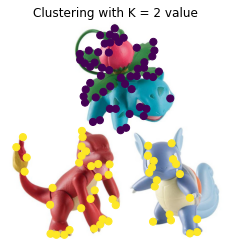

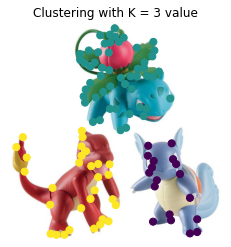

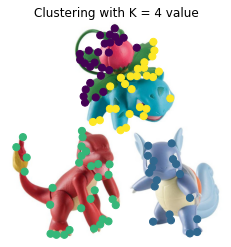

In [3]:
for Number_Of_Cluster in range(2,5):
    # Calling the function K_Means_Finder(X,K_means_Cluster_Value,Number_Of_Iteration)
    Points1,Euclidean_Distance1 = K_Means_Finder(X,Number_Of_Cluster,100)  # K = 3

    # Plotting Image with the different clustered colored points
    Plot_Original_Image = plt.imshow(Input_Image);
    plt.scatter(X[:,0],X[:,1],c=Euclidean_Distance1, s = 50);
    plt.title("Clustering with K = {} value".format(Number_Of_Cluster));
    plt.axis('off');
    plt.show();

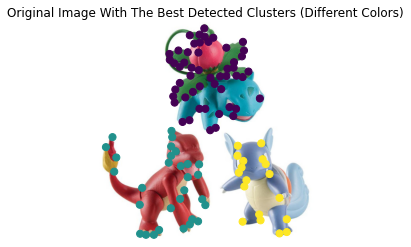

In [4]:
# Calling the function K_Means_Finder(X,K_means_Cluster_Value,Number_Of_Iteration)
K_means_Cluster_Value = 3
Points,Euclidean_Distance = K_Means_Finder(X,K_means_Cluster_Value,100)  # K = 3

# Plotting Image with the different clustered colored points
Plot_Original_Image = plt.imshow(Input_Image);
plt.scatter(X[:,0],X[:,1],c=Euclidean_Distance, s = 50);
plt.axis('off');
plt.title("Original Image With The Best Detected Clusters (Different Colors)");
plt.show();

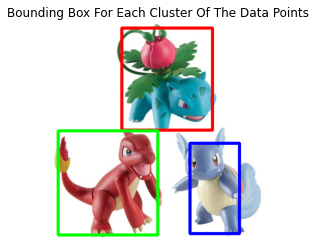

In [5]:
Colors = [(255,0,0),(0,255,0),(0,0,255)]

for k1 in range(1,K_means_Cluster_Value+1):
    _ = cv2.rectangle(Input_Image, (max(Points[k1][:,0]),max(Points[k1][:,1])), (min(Points[k1][:,0]),min(Points[k1][:,1])), Colors[k1-1], 7)

plt.axis('off');
plt.title("Bounding Box For Each Cluster Of The Data Points");
plt.imshow(_);